In [1]:
# %load common.py
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

def load_autos_dataset():
    auto = pd.read_csv('./data/Auto.csv', na_values='?', index_col='name')
    auto = auto.dropna()
    return auto

def load_boston_dataset():
    rdataset = sm.datasets.get_rdataset('Boston', 'MASS', True)
    return rdataset.data

def load_carseats_dataset():
    return pd.read_csv('./data/Carseats.csv', index_col=0)


/Users/ross/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def get_usarrests_dataset():
    rdataset = sm.datasets.get_rdataset('USArrests')
    return rdataset.data

In [3]:
usarrests = get_usarrests_dataset()

In [4]:
usarrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
usarrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
usarrests.var(axis=0)

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [7]:
from sklearn.decomposition import PCA
pca = PCA()

In [8]:
usarrests_std = (usarrests - usarrests.mean()) / usarrests.std()

In [9]:
usarrests_std.mean(axis=0)

Murder      1.543210e-16
Assault     1.115774e-16
UrbanPop   -4.307665e-16
Rape        8.704149e-16
dtype: float64

In [10]:
usarrests_std.std()

Murder      1.0
Assault     1.0
UrbanPop    1.0
Rape        1.0
dtype: float64

In [11]:
pca.fit(usarrests_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [13]:
pca.explained_variance_

array([ 2.48024158,  0.98976515,  0.35656318,  0.17343009])

In [14]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

In [52]:
x = np.random.normal(size=(50, 2))

In [54]:
x

array([[ 0.22201115, -0.21351892],
       [-0.03879272, -0.4531529 ],
       [-2.38085333,  0.99236071],
       [-0.52469907,  1.21112167],
       [-1.01699865, -1.82849371],
       [ 0.51331451, -0.8999106 ],
       [ 1.39381724, -0.02087423],
       [ 0.87345034, -1.345335  ],
       [-0.99076783, -1.80056467],
       [-0.52184834,  1.01908744],
       [-0.0324943 , -1.1455029 ],
       [-0.47344576,  0.28059781],
       [ 0.66215336,  0.31243601],
       [ 0.66914838, -0.22017881],
       [ 0.30867675,  0.03226454],
       [-0.48371048,  0.05036234],
       [ 2.35190062,  0.2273119 ],
       [-0.47681048, -1.76374357],
       [-0.54236701, -1.47728878],
       [-0.55859936,  2.08718926],
       [ 2.78526627, -0.02803957],
       [ 1.82103971,  0.49828033],
       [ 1.82616126, -1.94526957],
       [ 0.52372386,  0.19205608],
       [ 1.09037015, -0.429899  ],
       [-0.85252724,  0.12173017],
       [-0.19908125, -0.35076205],
       [ 0.22391834, -1.05767998],
       [ 1.22737568,

In [56]:
x[:25,0] = x[:25,0] + 3
x[:25,1] = x[:25,1] -4

In [23]:
from sklearn.cluster import KMeans

In [57]:
kmeans = KMeans(n_clusters=2, random_state=20).fit(x)

In [58]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [43]:
%matplotlib inline

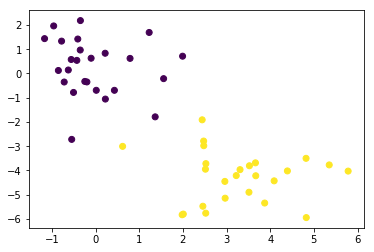

In [59]:
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_)

In [60]:
kmeans = KMeans(n_clusters=3).fit(x)

In [61]:
kmeans.cluster_centers_

array([[-0.07810242,  0.46368006],
       [ 3.52312602, -4.57040301],
       [ 1.47196574, -2.53352893]])

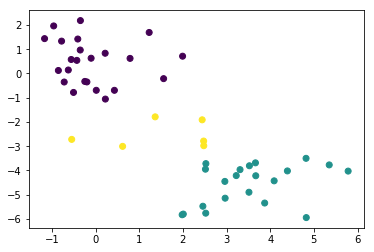

In [62]:
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_)

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
z = AgglomerativeClustering(linkage='complete').fit(x)

In [70]:
z.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

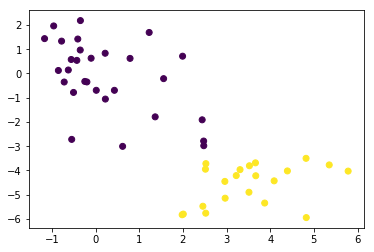

In [71]:
plt.scatter(x[:,0], x[:,1], c=z.labels_)